In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/fake_news_dataset.csv")

In [ ]:
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [ ]:
df["source"].fillna(method="ffill", inplace=True)
df["source"].fillna(method="bfill", inplace=True)

<ipython-input-9-03d368009286>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["source"].fillna(method="ffill", inplace=True)
<ipython-input-9-03d368009286>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["source"].fillna(method="ffill", inplace=True)
<ipython-input-9-03d368009286>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["source"].f

In [ ]:
df["author"].fillna(method="ffill", inplace=True)
df["source"].fillna(method="bfill", inplace=True)

<ipython-input-11-0bfd8ec3066e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["author"].fillna(method="ffill", inplace=True)
<ipython-input-11-0bfd8ec3066e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["author"].fillna(method="ffill", inplace=True)
<ipython-input-11-0bfd8ec3066e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["source"

In [ ]:
df.isnull().sum()

,0
title,0
text,0
date,0
source,0
author,0
category,0
label,0


In [ ]:
df["date"] = pd.to_datetime(df["date"], errors= "coerce")

In [ ]:
df.date.head()

,date
0,2023-03-10
1,2022-05-25
2,2022-09-01
3,2023-02-07
4,2023-04-03


In [ ]:
df["label"] = df["label"].map({"real" : 1, "fake" : 0})

In [ ]:
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,1
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,0
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,0
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,0
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,0


In [ ]:
df["label"].value_counts()

,count
label,
0,10056
1,9944


In [ ]:
top_sources = df['source'].value_counts().nlargest(10)

<ipython-input-25-c4f3e77cea79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sources.index, x=top_sources.values, palette='viridis')


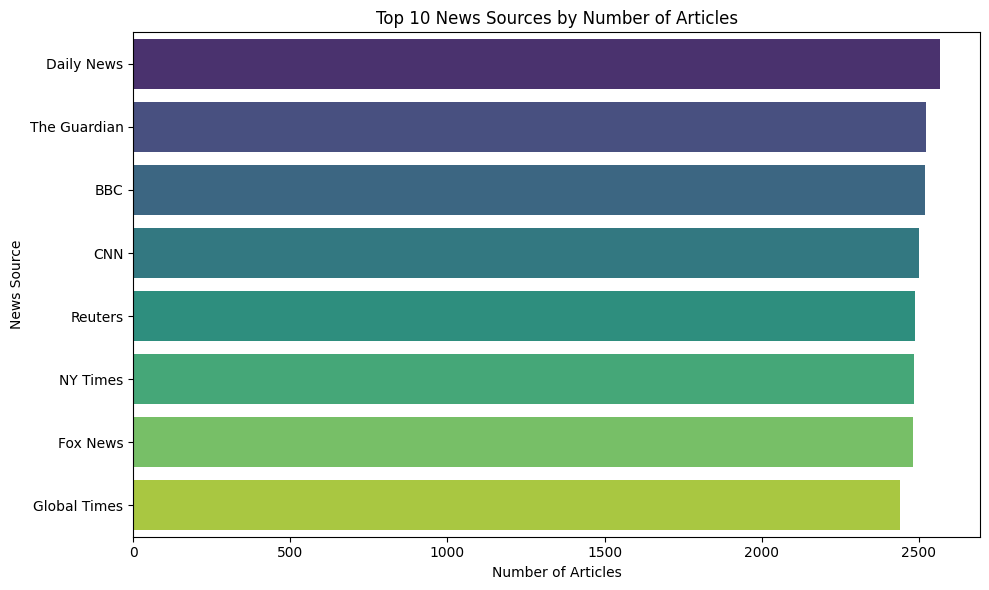

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_sources.index, x=top_sources.values, palette='viridis')
plt.title("Top 10 News Sources by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("News Source")
plt.tight_layout()
plt.show()

In [ ]:
top_catagories = df["category"].value_counts().nlargest(10)

<ipython-input-30-1f415caf92ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_catagories.index, x=top_catagories.values, palette="magma")


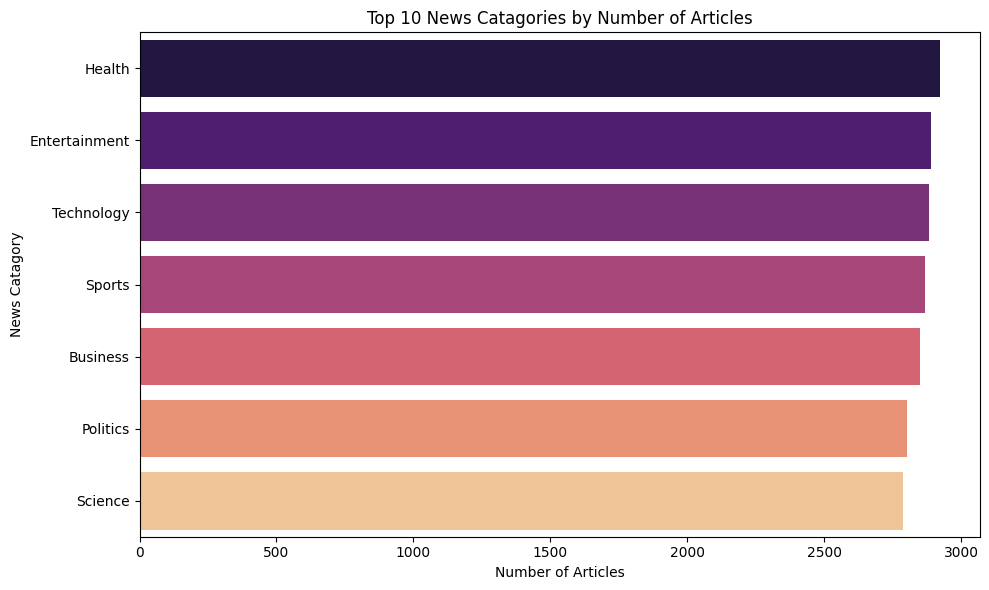

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_catagories.index, x=top_catagories.values, palette="magma")
plt.title("Top 10 News Catagories by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("News Catagory")
plt.tight_layout()
plt.show()

In [ ]:
# Combine title + text
df['content'] = df['title'] + ' ' + df['text']

# Minimal stopwords list
stopwords = set([
    'the', 'a', 'an', 'and', 'or', 'in', 'on', 'at', 'of', 'for', 'to', 'with',
    'is', 'are', 'was', 'were', 'be', 'been', 'it', 'this', 'that', 'by', 'as',
    'from', 'but', 'if', 'not', 'they', 'their', 'them', 'we', 'you', 'i'
])

# Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    return [word for word in words if word not in stopwords]

# Apply to real and fake
real_words = df[df['label'] == 1]['content'].apply(clean_text).sum()
fake_words = df[df['label'] == 0]['content'].apply(clean_text).sum()

# Get top 20 words
top_real = Counter(real_words).most_common(20)
top_fake = Counter(fake_words).most_common(20)

# Plot
plt.figure(figsize=(14, 6))

# Fake news plot
plt.subplot(1, 2, 1)
sns.barplot(x=[word[1] for word in top_fake], y=[word[0] for word in top_fake], palette='Reds_r')
plt.title("Top 20 Words in Fake News")

# Real news plot
plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in top_real], y=[word[0] for word in top_real], palette='Blues_r')
plt.title("Top 20 Words in Real News")

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined